In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
from highlight_text import htext, fig_text, HighlightText

In [3]:
df = pd.read_csv('barca_juve.csv')

In [4]:
df.head()

,Unnamed: 0,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Juventus,00:00:00.000,Starting XI,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",Barcelona,00:00:00.000,Starting XI,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:00.000,Half Start,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,00:00:00.000,Half Start,NaN


In [5]:
df.columns

Index(['Unnamed: 0', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_length', 'pass_miscommunication', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch',

In [6]:
df = df[['team','player','type','location','pass_end_location','pass_outcome']]

In [7]:
df.head()

,team,player,type,location,pass_end_location,pass_outcome
0,Juventus,NaN,Starting XI,NaN,NaN,NaN
1,Barcelona,NaN,Starting XI,NaN,NaN,NaN
2,Juventus,NaN,Half Start,NaN,NaN,NaN
3,Barcelona,NaN,Half Start,NaN,NaN,NaN
4,Juventus,NaN,Half Start,NaN,NaN,NaN


In [8]:
df = df[(df['team']=='Barcelona') & (df['type']=='Pass')]

In [9]:
df.head()

,team,player,type,location,pass_end_location,pass_outcome
13,Barcelona,Gerard Piqué Bernabéu,Pass,"[30.0, 66.0]","[39.0, 71.0]",NaN
14,Barcelona,Daniel Alves da Silva,Pass,"[39.0, 71.0]","[40.0, 64.0]",NaN
15,Barcelona,Sergio Busquets i Burgos,Pass,"[40.0, 64.0]","[43.0, 73.0]",NaN
16,Barcelona,Daniel Alves da Silva,Pass,"[44.0, 73.0]","[49.0, 74.0]",NaN
17,Barcelona,Daniel Alves da Silva,Pass,"[43.0, 76.0]","[16.0, 66.0]",NaN


In [10]:
df['player'].unique()

array(['Gerard Piqué Bernabéu', 'Daniel Alves da Silva',
       'Sergio Busquets i Burgos', 'Marc-André ter Stegen',
       'Javier Alejandro Mascherano', 'Jordi Alba Ramos', 'Ivan Rakitić',
       'Neymar da Silva Santos Junior', 'Lionel Andrés Messi Cuccittini',
       'Andrés Iniesta Luján', 'Luis Alberto Suárez Díaz',
       'Xavier Hernández Creus', 'Jérémy Mathieu',
       'Pedro Eliezer Rodríguez Ledesma'], dtype=object)

In [11]:
df = df.query(f"(type == 'Pass') & (pass_outcome not in ['Unknown','Out','Pass Offside','Injury Clearance'])")

In [12]:
df = df[(df['team']=='Barcelona') & (df['type']=='Pass') & (df['player']=='Andrés Iniesta Luján')].reset_index()

In [13]:
df

,index,team,player,type,location,pass_end_location,pass_outcome
0,39,Barcelona,Andrés Iniesta Luján,Pass,"[76.0, 24.0]","[87.0, 5.0]",NaN
1,46,Barcelona,Andrés Iniesta Luján,Pass,"[112.0, 31.0]","[110.0, 38.0]",NaN
2,105,Barcelona,Andrés Iniesta Luján,Pass,"[77.0, 19.0]","[78.0, 26.0]",NaN
3,107,Barcelona,Andrés Iniesta Luján,Pass,"[70.0, 22.0]","[55.0, 30.0]",NaN
4,133,Barcelona,Andrés Iniesta Luján,Pass,"[62.0, 7.0]","[46.0, 8.0]",NaN
5,144,Barcelona,Andrés Iniesta Luján,Pass,"[85.0, 19.0]","[68.0, 12.0]",NaN
6,156,Barcelona,Andrés Iniesta Luján,Pass,"[53.0, 42.0]","[45.0, 22.0]",NaN
7,181,Barcelona,Andrés Iniesta Luján,Pass,"[80.0, 42.0]","[73.0, 49.0]",NaN
8,187,Barcelona,Andrés Iniesta Luján,Pass,"[78.0, 27.0]","[74.0, 21.0]",NaN
9,225,Barcelona,Andrés Iniesta Luján,Pass,"[83.0, 21.0]","[97.0, 14.0]",NaN


In [14]:
df['pass_outcome'].unique()

array([nan, 'Incomplete'], dtype=object)

In [15]:
df.fillna('Successful',inplace=True)
df['pass_outcome'].value_counts()

Successful    50
Incomplete     5
Name: pass_outcome, dtype: int64

In [16]:
df[['x','y']] = df['location'].str.split(expand=True)
df[['endX','endY']] = df['pass_end_location'].str.split(expand=True)

In [17]:
df.head()

,index,team,player,type,location,pass_end_location,pass_outcome,x,y,endX,endY
0,39,Barcelona,Andrés Iniesta Luján,Pass,"[76.0, 24.0]","[87.0, 5.0]",Successful,"[76.0,",24.0],"[87.0,",5.0]
1,46,Barcelona,Andrés Iniesta Luján,Pass,"[112.0, 31.0]","[110.0, 38.0]",Successful,"[112.0,",31.0],"[110.0,",38.0]
2,105,Barcelona,Andrés Iniesta Luján,Pass,"[77.0, 19.0]","[78.0, 26.0]",Successful,"[77.0,",19.0],"[78.0,",26.0]
3,107,Barcelona,Andrés Iniesta Luján,Pass,"[70.0, 22.0]","[55.0, 30.0]",Successful,"[70.0,",22.0],"[55.0,",30.0]
4,133,Barcelona,Andrés Iniesta Luján,Pass,"[62.0, 7.0]","[46.0, 8.0]",Successful,"[62.0,",7.0],"[46.0,",8.0]


In [18]:
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1:-1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0:-1]).astype(float)
df['endX'] = df.loc[:,'endX'] = df.endX.map(lambda x: x[1:-1]).astype(float)
df['endY'] = df.loc[:,'endY'] = df.endY.map(lambda x: x[0:-1]).astype(float)
df.drop(['location', 'pass_end_location'],axis=1,inplace=True)

In [19]:
df.head()

,index,team,player,type,pass_outcome,x,y,endX,endY
0,39,Barcelona,Andrés Iniesta Luján,Pass,Successful,76.0,24.0,87.0,5.0
1,46,Barcelona,Andrés Iniesta Luján,Pass,Successful,112.0,31.0,110.0,38.0
2,105,Barcelona,Andrés Iniesta Luján,Pass,Successful,77.0,19.0,78.0,26.0
3,107,Barcelona,Andrés Iniesta Luján,Pass,Successful,70.0,22.0,55.0,30.0
4,133,Barcelona,Andrés Iniesta Luján,Pass,Successful,62.0,7.0,46.0,8.0


In [20]:
df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40-df['y']))
df['end'] = np.sqrt(np.square(120-df['endX']) + np.square(40-df['endY']))

In [21]:
df.head()

,index,team,player,type,pass_outcome,x,y,endX,endY,beginning,end
0,39,Barcelona,Andrés Iniesta Luján,Pass,Successful,76.0,24.0,87.0,5.0,46.818800,48.104054
1,46,Barcelona,Andrés Iniesta Luján,Pass,Successful,112.0,31.0,110.0,38.0,12.041595,10.198039
2,105,Barcelona,Andrés Iniesta Luján,Pass,Successful,77.0,19.0,78.0,26.0,47.853944,44.271887
3,107,Barcelona,Andrés Iniesta Luján,Pass,Successful,70.0,22.0,55.0,30.0,53.141321,65.764732
4,133,Barcelona,Andrés Iniesta Luján,Pass,Successful,62.0,7.0,46.0,8.0,66.730802,80.622577


In [22]:
df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]

In [23]:
df = df[df['progressive']==True].reset_index()

In [24]:
df

,level_0,index,team,player,type,pass_outcome,x,y,endX,endY,beginning,end,progressive
0,31,454,Barcelona,Andrés Iniesta Luján,Pass,Successful,85.0,27.0,103.0,28.0,37.336309,20.808652,True
1,34,493,Barcelona,Andrés Iniesta Luján,Pass,Successful,69.0,15.0,88.0,22.0,56.797887,36.715120,True
2,43,607,Barcelona,Andrés Iniesta Luján,Pass,Successful,61.0,24.0,92.0,29.0,61.131007,30.083218,True
3,49,671,Barcelona,Andrés Iniesta Luján,Pass,Successful,89.0,36.0,99.0,47.0,31.256999,22.135944,True
4,50,754,Barcelona,Andrés Iniesta Luján,Pass,Incomplete,96.0,42.0,113.0,38.0,24.083189,7.280110,True
5,54,817,Barcelona,Andrés Iniesta Luján,Pass,Incomplete,33.0,44.0,89.0,64.0,87.091905,39.204592,True


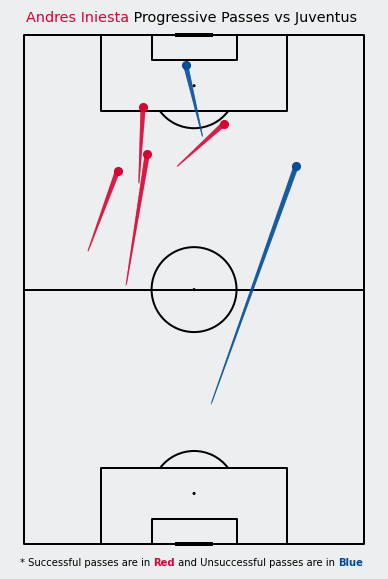

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
fig.set_facecolor('#edeeef')
ax.patch.set_facecolor('#edeeef')

pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='#edeeef', line_color='black', figsize=(13,8))
pitch.draw(ax=ax)


for x in range(len(df['x'])):
    if df['pass_outcome'][x] == 'Successful':
        pitch.lines(df['x'][x], df['y'][x], df['endX'][x], df['endY'][x], comet=True, lw=5, ax=ax, color='#DB0030', alpha=0.7)
        pitch.scatter(df['endX'][x], df['endY'][x], color='#DB0030', s=65, ax=ax)
    if df['pass_outcome'][x] == 'Incomplete':
        pitch.lines(df['x'][x], df['y'][x], df['endX'][x], df['endY'][x], comet=True, lw=5, ax=ax, color='#004D98', alpha=0.7)
        pitch.scatter(df['endX'][x], df['endY'][x], color='#004D98', s=65, ax=ax)


fig_text(s = '<Andres Iniesta> Progressive Passes vs Juventus',
            x = 0.51, y = 0.89,
            fontsize=14.4,
            fontweight='medium',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"#DB0030"}]
        )

fig_text(s = '* Successful passes are in <Red> and Unsuccessful passes are in <Blue>',
            x = 0.51, y = 0.13,
            fontsize=10,
            fontweight='medium',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"#DB0030", 'fontweight':'bold'}, {'color':'#004D98', 'fontweight':'bold'}]
            
        );

plt.savefig('Iniesta_Final', dpi=75, facecolor='#edeeef', bbox_inches='tight')